In [4]:
import collections
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [69]:
import warnings
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
import hdbscan #DBSCAN Implementation
import pandas as pd

import wikipedia

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

In [135]:
import nltk
# uncomment to download
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
def tokenizer(text):    

    tokens = word_tokenize(text)

    stemmer = PorterStemmer()

    return [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]

In [44]:
### stopwords and pontuations 
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
custom_stopwords = text.ENGLISH_STOP_WORDS.union(punc)

In [95]:
def loadCorpus(topic_array):
    corpus = []    
    for topic in topics_array:
        summary = wikipedia.summary(topic, sentences=500)        
        for sentences in sent_tokenize(summary):
            corpus.append(sentences)
        
    return corpus

In [103]:
# load corpus from wikipedia pages
topics_array = ['machine learning', 'linguistic', 'Master theorem (analysis of algorithms)', 'Ciclism','baseball','earthquakes','ocean atlantic','Religion']
train_corpus = loadCorpus(topics_array)

In [104]:
tfidf_vect = TfidfVectorizer(tokenizer=tokenizer,
                            stop_words=custom_stopwords,                            
                            max_df=0.95,                            
                            max_features=300,
                            lowercase=True)

In [105]:
len(train_corpus)

81

In [106]:
train = tfidf_vect.fit_transform(train_corpus)

train_array = train.toarray()

In [107]:
train_array.shape #, tfidf_vect.get_feature_names()

(81, 300)

clusters [-1]


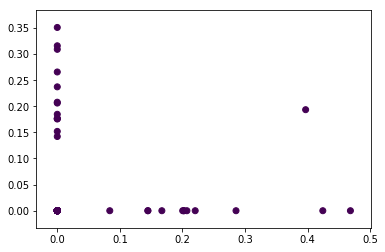

In [111]:
# Performing DBSCAN
clusters = hdbscan.HDBSCAN(min_cluster_size=60, prediction_data=True).fit(train_array)

print('clusters', np.unique(clusters.labels_))

plt.scatter(train_array.T[0], train_array.T[1], c=clusters.labels_)

In [77]:
def mountSentencesRank():
    df = pd.DataFrame({'n_cluster': [], 'idx_word': [], 'word': [], 'tfidf': []})
    for c, i in enumerate(clusters.labels_):
        if i == -1:
            continue
        df = df.append({'n_cluster': i, 'idx_word': c, 'word': train_corpus[c], 'tfidf': train_array[c].mean()}, ignore_index=True)
    return df

In [78]:
def query(text):
    
    test = tfidf_vect.transform(text)
    test_array = test.toarray()
    
    query_labels, strengths = hdbscan.approximate_predict(clusters, test_array)
    label_pred = query_labels[0]
    
    rank = mountSentencesRank()
    
    res = rank[rank['n_cluster'] == label_pred].sort_values('tfidf', ascending=False).head()

    most_frequent = res['word'].values
    
    return most_frequent

In [79]:
query_text = ['While some theories on linguistics focus on the different varieties that language produces, among different sections of society, others focus on the universal properties that are common to all human languages. The theory of variation therefore would elaborate on the different usages of popular languages like French and English across the globe, as well as its smaller dialects and regional permutations within their national boundaries. The theory of variation looks at the cultural stages that a particular language undergoes, and these include the following.']
query(query_text)

array(["According to Chomsky, competence is an individual's innate capacity and potential for language (like in Saussure's langue), while performance is the specific way in which it is used by individuals, groups, and communities (i.e., parole, in Saussurean terms).The study of parole (which manifests through cultural discourses and dialects) is the domain of sociolinguistics, the sub-discipline that comprises the study of a complex system of linguistic facets within a certain speech community (governed by its own set of grammatical rules and laws).",
       '== Overview ==\nTom M. Mitchell provided a widely quoted, more formal definition of the algorithms studied in the machine learning field: "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E." This definition of the tasks in which machine learning is concerned offers a fundamentally opera